In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Case for homogeneous probabilility weights

at [0, 0]: mc = 0.090
at [0, 1]: mc = 0.120
at [0, 2]: mc = 0.125

at [1, 0]: mc = 0.088
at [1, 1]: mc = 0.113
at [1, 2]: mc = 0.112

at [2, 0]: mc = 0.105
at [2, 1]: mc = 0.127
at [2, 2]: mc = 0.120



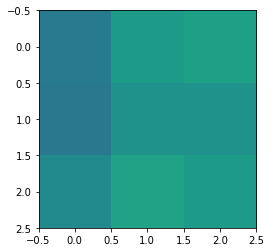

In [145]:
nrep = 1000

count = np.zeros((3, 3))
moves = np.array([[+1, 0], [-1, 0], [0, +1], [0, -1]])
rand = np.random.rand(nrep)
rand[rand == 1.] = 0.99
coins = np.floor(4 * rand)

pos = np.random.randint(3, size=2)
for coin in coins:
    ahead = pos + moves[int(coin)]
    if ahead[0] < 0 or ahead[0] > 2 or ahead[1] < 0 or ahead[1] > 2:
        count[pos[0], pos[1]] += 1
    else:
        pos = ahead
        count[pos[0], pos[1]] += 1
        
plt.rcParams['figure.figsize'] = (4.0, 4.0)
count_norm = count / count.sum()
plt.imshow(count_norm)
plt.clim((0., 0.22))

for i in range(3):
    for j in range(3):
        print('at [{:d}, {:d}]: mc = {:1.3f}'.\
              format(i, j, count_norm[i,j]))
    print()

# Case for inhomogeneous probabilility weights

at [0, 0]: (pi, mc) = (0.163, 0.134)
at [0, 1]: (pi, mc) = (0.051, 0.055)
at [0, 2]: (pi, mc) = (0.151, 0.193)

at [1, 0]: (pi, mc) = (0.096, 0.088)
at [1, 1]: (pi, mc) = (0.029, 0.030)
at [1, 2]: (pi, mc) = (0.054, 0.060)

at [2, 0]: (pi, mc) = (0.146, 0.141)
at [2, 1]: (pi, mc) = (0.173, 0.165)
at [2, 2]: (pi, mc) = (0.136, 0.133)



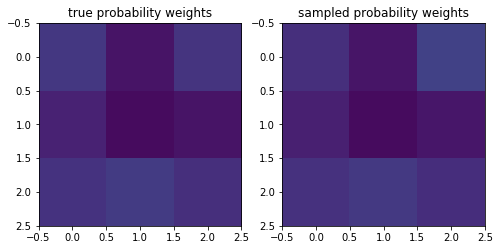

In [146]:
nrep = 10000

pi = np.random.rand(3, 3)
pi /= pi.sum()
count = np.zeros((3, 3))
moves = np.array([[+1, 0], [-1, 0], [0, +1], [0, -1]])

rand = np.random.rand(nrep)
rand[rand == 1.] = 0.99
coins = np.floor(4 * rand)

pos = np.random.randint(3, size=2)
for coin in coins:
    ahd = pos + moves[int(coin)]
    if ahd[0] < 0 or ahd[0] > 2 or ahd[1] < 0 or ahd[1] > 2:
        count[pos[0], pos[1]] += 1
    else:
        ratio  = pi[ahd[0], ahd[1]] / pi[pos[0], pos[1]]
        if ratio > 1:
            pos = ahd
            count[pos[0], pos[1]] += 1
        elif np.random.rand() <= ratio:
            pos = ahd
            count[pos[0], pos[1]] += 1
        else:
            count[pos[0], pos[1]] += 1

count_norm = count / count.sum()

plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.subplot(1, 2, 1)
plt.imshow(pi)
plt.title('true probability weights')
plt.clim((0., 1.))
plt.subplot(1, 2, 2)
plt.imshow(count_norm)
plt.clim((0., 1.))
plt.title('sampled probability weights')

for i in range(3):
    for j in range(3):
        print('at [{:d}, {:d}]: (pi, mc) = ({:1.3f}, {:1.3f})'.\
              format(i, j, pi[i,j], count_norm[i,j]))
    print()